In [2]:
img_rows, img_cols = (400, 630)


from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(input_shape = (img_rows, img_cols, 3), include_top = False, weights = 'imagenet')


In [32]:
for layer in base_model.layers:
    layer.trainable = False

In [33]:
from tensorflow.keras.optimizers import Adam
from keras import layers
import tensorflow as tf

x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)

x = layers.Dense(4, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = Adam(learning_rate=0.001), loss = 'binary_crossentropy', metrics = ['acc'])

In [3]:
import joblib

data_records = joblib.load("data_records.pkl")

In [4]:
def create_rgb(image):
    return np.stack((image,) * 3, axis=-1)

In [5]:
import numpy as np
X = data_records["images"]
X = np.array([create_rgb(img) for img in X])

y = np.array(data_records['grade'])

In [6]:
from sklearn import preprocessing
import tensorflow as tf
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, stratify=y)

le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

y_train = tf.keras.utils.to_categorical(y_train, num_classes=4)

y_test = tf.keras.utils.to_categorical(y_test, num_classes=4)

y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
def display_conf_matrix(conf_matrix):
    # Plot the confusion matrix
    class_names = ["Grade 1", "Grade 2", "Grade 3", "Grade 4"]
    plt.figure(figsize=(5, 4))
    sns.heatmap(
        conf_matrix,
        annot=True,
        cmap="Blues",
        fmt="d",
        xticklabels=class_names,
        yticklabels=class_names,
    )
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()


In [8]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score

def display_pred_results(model, X_test, y_test):
    y_pred = model.predict(X_test)

    y_pred_labels = np.argmax(y_pred, axis=1)
    y_true_labels = np.argmax(y_test, axis=1)

    conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

    class_report = classification_report(y_true_labels, y_pred_labels)

    accuracy = accuracy_score(y_true_labels, y_pred_labels)

    # auc = roc_auc_score(y_true_labels, y_pred_labels)
    print("\nPrecision score", precision_score(y_true_labels, y_pred_labels, average="weighted"))

    recall = recall_score(y_true_labels, y_pred_labels, average="weighted")
    print("\nRecall:", recall)

    f1 = f1_score(y_true_labels, y_pred_labels, average="weighted")
    print("\nF1 score: ", f1)

    print("\nClassification Report:")
    print(class_report)
    print("\nAccuracy:", accuracy)
    display_conf_matrix(conf_matrix)

In [39]:



inc_history = model.fit(
    X_train,
    y_train,
    epochs=5,
    validation_data=(X_test, y_test),
    verbose=1,
    initial_epoch=0,
)


Epoch 1/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 63s 4s/step - acc: 0.3089 - loss: 1772.3110 - val_acc: 0.7182 - val_loss: 229.7798
Epoch 2/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 44s 3s/step - acc: 0.8155 - loss: 180.5541 - val_acc: 0.8909 - val_loss: 48.5504
Epoch 3/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 46s 3s/step - acc: 0.9440 - loss: 39.9413 - val_acc: 0.9273 - val_loss: 31.3571
Epoch 4/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 46s 3s/step - acc: 0.9951 - loss: 16.5190 - val_acc: 0.9636 - val_loss: 43.4824
Epoch 5/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 47s 3s/step - acc: 0.9861 - loss: 15.4009 - val_acc: 0.9909 - val_loss: 6.5627


4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step

Precision score 0.972972972972973

Recall: 0.9727272727272728

F1 score:  0.9727322540473226

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        36
           1       0.97      0.95      0.96        38
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        20

    accuracy                           0.97       110
   macro avg       0.98      0.98      0.98       110
weighted avg       0.97      0.97      0.97       110


Accuracy: 0.9727272727272728


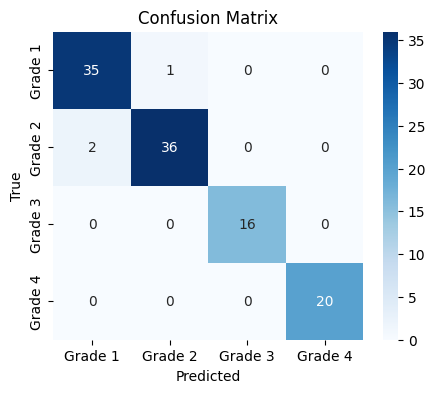

In [43]:
display_pred_results(model, X_test, y_test)

In [ ]:



inc_history = model.fit(
    X_train,
    y_train,
    epochs=5,
    validation_data=(X_test, y_test),
    verbose=1,
    initial_epoch=0,
)


Epoch 1/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 63s 4s/step - acc: 0.3089 - loss: 1772.3110 - val_acc: 0.7182 - val_loss: 229.7798
Epoch 2/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 44s 3s/step - acc: 0.8155 - loss: 180.5541 - val_acc: 0.8909 - val_loss: 48.5504
Epoch 3/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 46s 3s/step - acc: 0.9440 - loss: 39.9413 - val_acc: 0.9273 - val_loss: 31.3571
Epoch 4/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 46s 3s/step - acc: 0.9951 - loss: 16.5190 - val_acc: 0.9636 - val_loss: 43.4824
Epoch 5/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 47s 3s/step - acc: 0.9861 - loss: 15.4009 - val_acc: 0.9909 - val_loss: 6.5627


# L2 regularisation

In [11]:
img_rows, img_cols = (400, 630)


from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(input_shape = (img_rows, img_cols, 3), include_top = False, weights = 'imagenet')



Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step - accuracy: 0.3030 - loss: 1024.9202 - val_accuracy: 0.3273 - val_loss: 452.6019
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.4172 - loss: 778.1882 - val_accuracy: 0.4545 - val_loss: 324.7404
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.5452 - loss: 364.6804 - val_accuracy: 0.8545 - val_loss: 23.7144
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.6053 - loss: 128.8842 - val_accuracy: 0.8636 - val_loss: 12.4597
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.5812 - loss: 49.2455 - val_accuracy: 0.7636 - val_loss: 3.5844
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 59s 4s/step - accuracy: 0.4210 - loss: 12.1095 - val_accuracy: 0.5545 - val_loss: 2.9447
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 79s 6s/step - accuracy: 0.3982 - loss: 3.9727 - val_accuracy: 0.3545 - val_loss: 3.1738
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.3177 - loss: 3.2978 - val_accuracy: 0

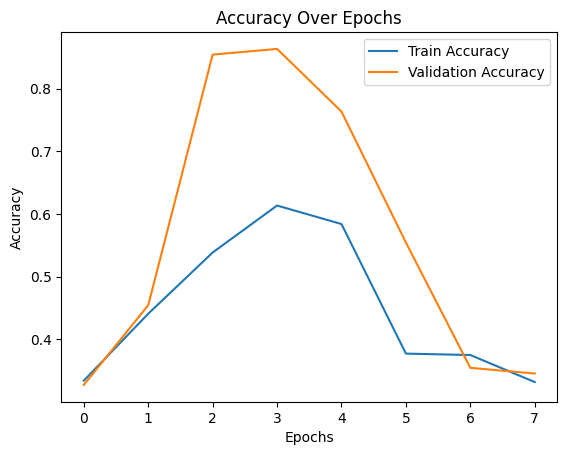

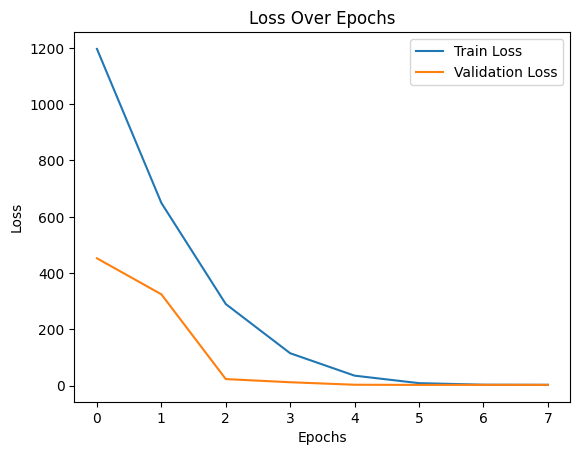

In [47]:
from keras import layers
import tensorflow as tf

# Assuming you have a base model (e.g., VGG16 or another pre-trained model)
# You can also adjust the input shape according to your data

# Start with the base model, but do not train its layers
for layer in base_model.layers:
    layer.trainable = False

# Add more layers with Dropout and Regularization
x = layers.Flatten()(base_model.output)

# Adding L2 Regularization
x = layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = layers.Dropout(0.5)(x)  # Higher dropout to reduce overfitting

# Adding another dense layer with Dropout
x = layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = layers.Dropout(0.5)(x)

# Final output layer with the appropriate number of classes and softmax activation for multi-class
x = layers.Dense(4, activation='softmax')(x)

# Create the new model
model = tf.keras.models.Model(base_model.input, x)

# Lower learning rate to reduce overfitting
optimizer = Adam(learning_rate=0.0005)

# Use categorical cross-entropy for multi-class problems
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Use early stopping with a lower patience
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Define training configuration
history = model.fit(
    X_train,
    y_train,
    epochs=20,  # This can be adjusted as needed
    validation_data=(X_test, y_test),
    verbose=1,
    callbacks=[early_stopping]
)

# Plot accuracy and loss to monitor overfitting
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()


Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 78s 6s/step - accuracy: 0.2262 - loss: 13042.7158 - val_accuracy: 0.3462 - val_loss: 4068.2922
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.3923 - loss: 4489.3364 - val_accuracy: 0.5989 - val_loss: 421.6148
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.4380 - loss: 1329.2964 - val_accuracy: 0.7418 - val_loss: 140.3657
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.6018 - loss: 475.5941 - val_accuracy: 0.8626 - val_loss: 119.7947
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.6877 - loss: 326.1436 - val_accuracy: 0.8077 - val_loss: 135.6738
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.7152 - loss: 225.8978 - val_accuracy: 0.8242 - val_loss: 106.1503
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.6950 - loss: 163.4129 - val_accuracy: 0.7912 - val_loss: 95.6795
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.6200 - loss: 111.7353 

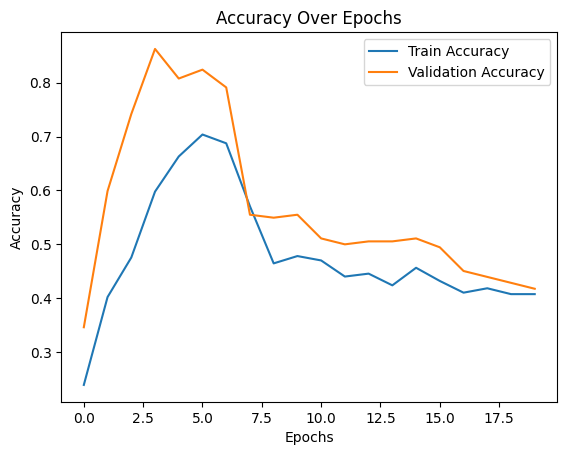

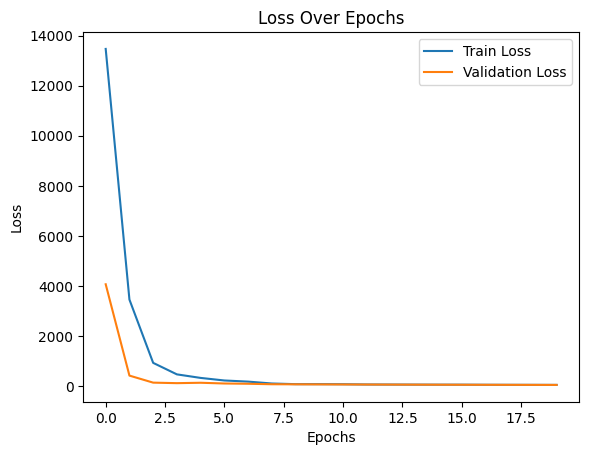

In [49]:
from keras import layers
import tensorflow as tf

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.33, stratify=y)

from tensorflow.keras.utils import to_categorical

# Assuming your original labels are integers indicating class indices
y_train = to_categorical(y_train, num_classes=4)  # Adjust the number of classes as needed
y_test = to_categorical(y_test, num_classes=4)
 
# Start with the base model, but do not train its layers
for layer in base_model.layers:
    layer.trainable = False

# Add more layers with Dropout and Regularization
x = layers.Flatten()(base_model.output)

# Adding L2 Regularization
x = layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = layers.Dropout(0.5)(x)  # Higher dropout to reduce overfitting

# Adding another dense layer with Dropout
x = layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = layers.Dropout(0.5)(x)

# Final output layer with the appropriate number of classes and softmax activation for multi-class
x = layers.Dense(4, activation='softmax')(x)

# Create the new model
model = tf.keras.models.Model(base_model.input, x)

# Lower learning rate to reduce overfitting
optimizer = Adam(learning_rate=0.005)

# Use categorical cross-entropy for multi-class problems
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Use early stopping with a lower patience
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Define training configuration
history = model.fit(
    X_train,
    y_train,
    epochs=20,  # This can be adjusted as needed
    validation_data=(X_test, y_test),
    verbose=1,
    callbacks=[early_stopping]
)

# Plot accuracy and loss to monitor overfitting
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()



6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step

Precision score 0.6400286104428116

Recall: 0.4175824175824176

F1 score:  0.31267404850583125

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.12      0.21        60
           1       0.37      1.00      0.54        63
           2       0.00      0.00      0.00        26
           3       1.00      0.18      0.31        33

    accuracy                           0.42       182
   macro avg       0.59      0.32      0.26       182
weighted avg       0.64      0.42      0.31       182


Accuracy: 0.4175824175824176


c:\Users\LWARRIER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LWARRIER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LWARRIER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

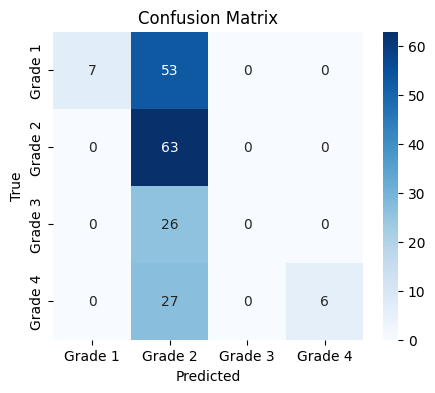

In [52]:
display_pred_results(model, X_test, y_test)


Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.2876 - loss: 27.6103 - val_accuracy: 0.3297 - val_loss: 4.7741
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.2561 - loss: 9.6290 - val_accuracy: 0.2912 - val_loss: 2.7353
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - accuracy: 0.3268 - loss: 5.2545 - val_accuracy: 0.3846 - val_loss: 1.8383
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 0.3155 - loss: 2.7705 - val_accuracy: 0.4341 - val_loss: 1.6339
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 0.3458 - loss: 1.9946 - val_accuracy: 0.4176 - val_loss: 1.6114
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 0.3321 - loss: 1.8747 - val_accuracy: 0.3462 - val_loss: 1.8768
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 0.3619 - loss: 1.8645 - val_accuracy: 0.3516 - val_loss: 1.6664


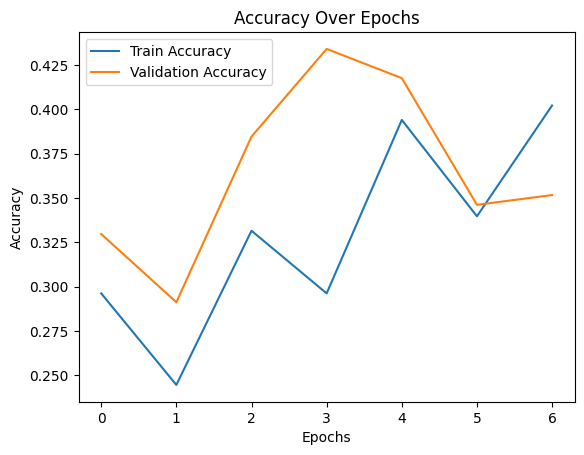

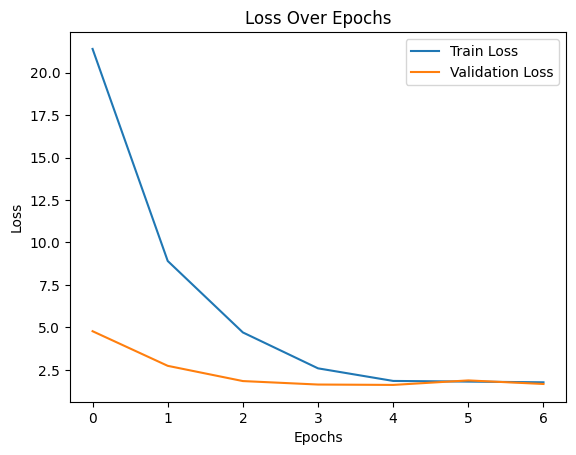

In [18]:
from tensorflow.keras.optimizers import Adam
from keras import layers
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.regularizers import l2



X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.33, stratify=y)

from tensorflow.keras.utils import to_categorical

# Assuming your original labels are integers indicating class indices
y_train = to_categorical(y_train, num_classes=4)  # Adjust the number of classes as needed
y_test = to_categorical(y_test, num_classes=4)
 
# Start with the base model, but do not train its layers
for layer in base_model.layers:
    layer.trainable = False

# Add new top layers with reduced complexity and regularization
x = layers.GlobalAveragePooling2D()(base_model.output)  # Global Average Pooling to reduce overfitting
x = layers.Dense(256, activation='relu', kernel_regularizer=l2(0.001))(x)  # Add L2 Regularization
x = layers.Dropout(0.3)(x)  # Dropout to reduce overfitting
x = layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)  # Simplify layers
x = layers.Dropout(0.3)(x)  # Dropout again for robustness

x = layers.Dense(4, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)
optimizer = Adam(learning_rate=0.005)

# Use categorical cross-entropy for multi-class problems
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

# Use early stopping with a lower patience
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Define training configuration
history = model.fit(
    X_train,
    y_train,
    epochs=20,  # This can be adjusted as needed
    validation_data=(X_test, y_test),
    verbose=1,
    callbacks=[early_stopping]
)

# Plot accuracy and loss to monitor overfitting
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step

Precision score 0.945054945054945

Recall: 0.9340659340659341

F1 score:  0.9343605216610591

Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        60
           1       1.00      0.95      0.98        63
           2       1.00      0.92      0.96        26
           3       1.00      0.79      0.88        33

    accuracy                           0.93       182
   macro avg       0.96      0.92      0.93       182
weighted avg       0.95      0.93      0.93       182


Accuracy: 0.9340659340659341


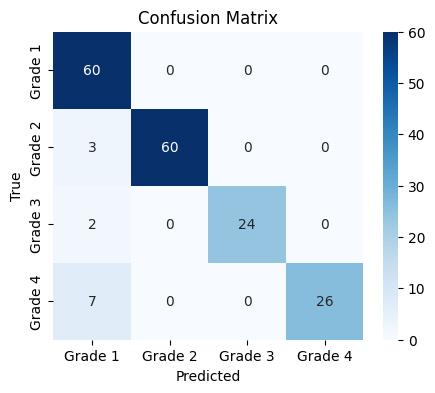

In [16]:
display_pred_results(model, X_test, y_test)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 44s 3s/step - accuracy: 0.2620 - loss: 27.1568 - val_accuracy: 0.3297 - val_loss: 3.2643
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.2749 - loss: 7.7367 - val_accuracy: 0.4451 - val_loss: 2.3457
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 194s 17s/step - accuracy: 0.3656 - loss: 3.7629 - val_accuracy: 0.4945 - val_loss: 1.6428
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 130s 11s/step - accuracy: 0.3322 - loss: 2.2735 - val_accuracy: 0.4176 - val_loss: 1.5983
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 88s 8s/step - accuracy: 0.3172 - loss: 1.6968 - val_accuracy: 0.3407 - val_loss: 1.6587
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 88s 8s/step - accuracy: 0.4025 - loss: 1.7006 - val_accuracy: 0.3462 - val_loss: 1.6613
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 88s 8s/step - accuracy: 0.4031 - loss: 1.6902 - val_accuracy: 0.4725 - val_loss: 1.5627
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 89s 8s/step - accuracy: 0.4294 - loss: 1.6514 - val_accuracy: 0.3462 - val_

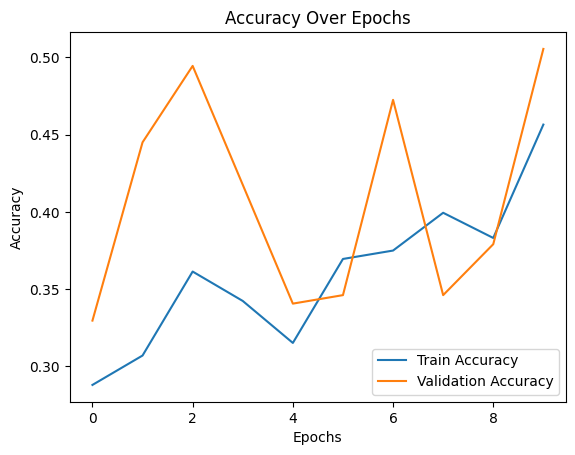

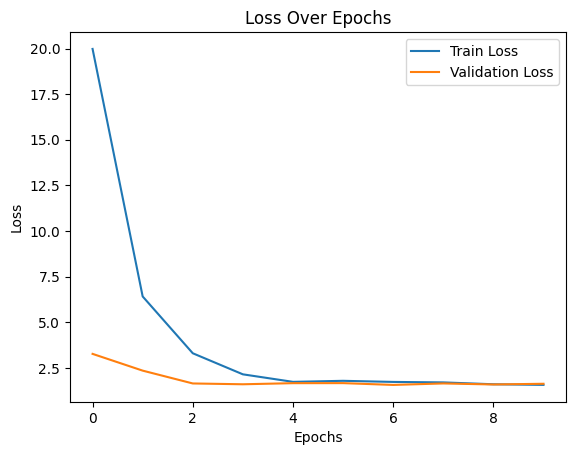

In [32]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras import layers
from keras.applications import InceptionV3  # Assuming you're using InceptionNet
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# Split the dataset into training and testing, ensuring stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=42)

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=4)  # Adjust the number of classes as needed
y_test = to_categorical(y_test, num_classes=4)

# Base model - InceptionV3 with pre-trained weights (do not include the top layers)
base_model = InceptionV3(input_shape = (img_rows, img_cols, 3), include_top = False, weights = 'imagenet')

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add new top layers with reduced complexity and regularization
x = layers.GlobalAveragePooling2D()(base_model.output)  # Global Average Pooling to reduce overfitting
x = layers.Dense(256, activation='relu', kernel_regularizer=l2(0.001))(x)  # Add L2 Regularization
x = layers.Dropout(0.3)(x)  # Dropout to reduce overfitting
x = layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)  # Simplify layers
x = layers.Dropout(0.3)(x)  # Dropout again for robustness

# Final dense layer with softmax activation for multi-class classification
x = layers.Dense(4, activation='softmax')(x)

# Create the complete model
model = tf.keras.models.Model(base_model.input, x)

# Compile with categorical cross-entropy and a lower learning rate
optimizer = Adam(learning_rate=0.001)  # Lower learning rate to avoid large fluctuations
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Use Early Stopping with a lower patience to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)



# Train the model with data augmentation
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    verbose=1,
    callbacks=[early_stopping]
)

# Plot training and validation accuracy to monitor for overfitting
plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()


Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 76s 6s/step - accuracy: 0.2224 - loss: 26.9845 - val_accuracy: 0.2582 - val_loss: 4.8980
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 79s 7s/step - accuracy: 0.3382 - loss: 8.2012 - val_accuracy: 0.3901 - val_loss: 2.4027
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 81s 7s/step - accuracy: 0.3781 - loss: 3.5002 - val_accuracy: 0.4231 - val_loss: 1.6713
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 76s 7s/step - accuracy: 0.3150 - loss: 2.0974 - val_accuracy: 0.3956 - val_loss: 1.6419
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 80s 7s/step - accuracy: 0.3492 - loss: 1.8862 - val_accuracy: 0.4066 - val_loss: 1.6379
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 79s 7s/step - accuracy: 0.3675 - loss: 1.7077 - val_accuracy: 0.4835 - val_loss: 1.7042
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 81s 7s/step - accuracy: 0.3680 - loss: 1.7519 - val_accuracy: 0.3846 - val_loss: 1.6083
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 78s 7s/step - accuracy: 0.4047 - loss: 1.6815 - val_accuracy: 0.3571 - val_loss

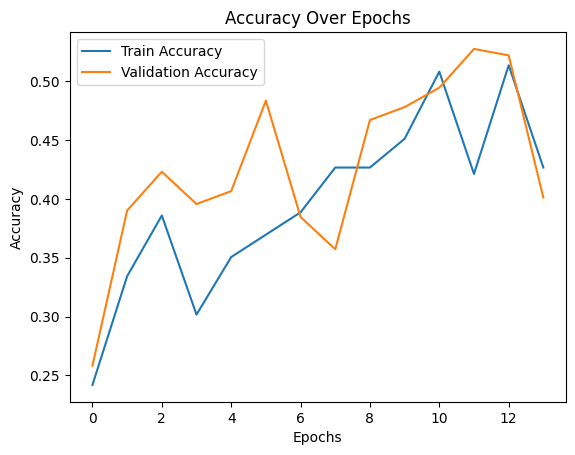

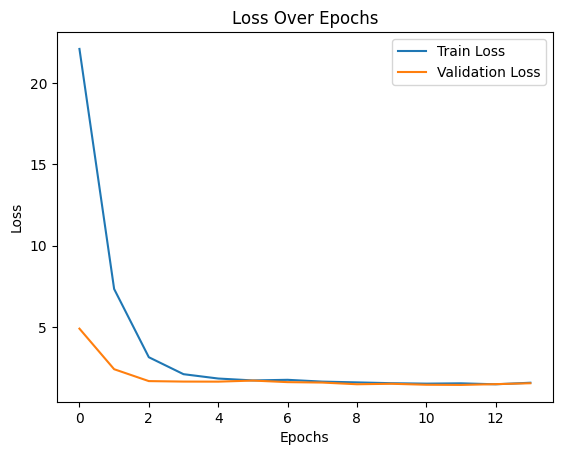

In [35]:
from keras import layers
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.33, stratify=y)

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=4)  # One-hot encoding
y_test = to_categorical(y_test, num_classes=4)

# Ensure base model is not trained
for layer in base_model.layers:
    layer.trainable = False

# Build the top layers with softmax activation for 4-class classification
x = layers.GlobalAveragePooling2D()(base_model.output)  # Global Average Pooling to reduce overfitting
x = layers.Dense(256, activation='relu', kernel_regularizer=l2(0.001))(x)
x = layers.Dropout(0.3)(x)  # Dropout to reduce overfitting
x = layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)
x = layers.Dropout(0.3)(x)

# Correct output layer with softmax for 4 classes
x = layers.Dense(4, activation='softmax')(x)  # Use softmax for multi-class

# Define the model with categorical cross-entropy
model = tf.keras.models.Model(base_model.input, x)
optimizer = Adam(learning_rate=0.005)

# Compile with categorical cross-entropy and appropriate optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    verbose=1,
    callbacks=[early_stopping]
)

# Plot the accuracy and loss for visualization
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()


Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step - accuracy: 0.2946 - loss: 30.3851 - val_accuracy: 0.3901 - val_loss: 6.4292
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.2953 - loss: 10.8795 - val_accuracy: 0.3516 - val_loss: 3.1893
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.3810 - loss: 4.7185 - val_accuracy: 0.5385 - val_loss: 1.5323
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 0.4769 - loss: 1.8997 - val_accuracy: 0.5824 - val_loss: 1.3169
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 0.4941 - loss: 1.4718 - val_accuracy: 0.5220 - val_loss: 1.3434
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 0.4331 - loss: 1.6395 - val_accuracy: 0.6044 - val_loss: 1.2690
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - accuracy: 0.5275 - loss: 1.4676 - val_accuracy: 0.6264 - val_loss: 1.1958
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 0.5292 - loss: 1.3700 - val_accuracy: 0.5934 - val_los

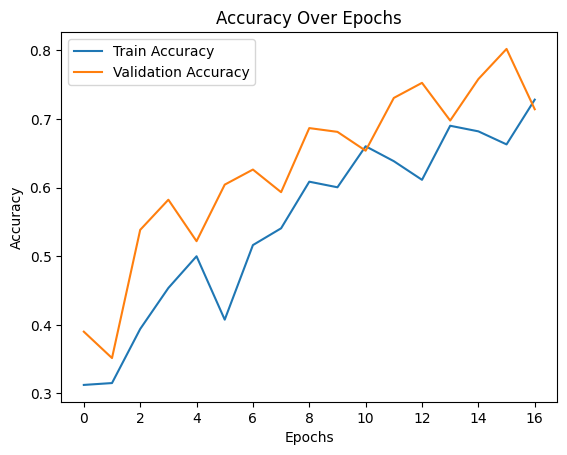

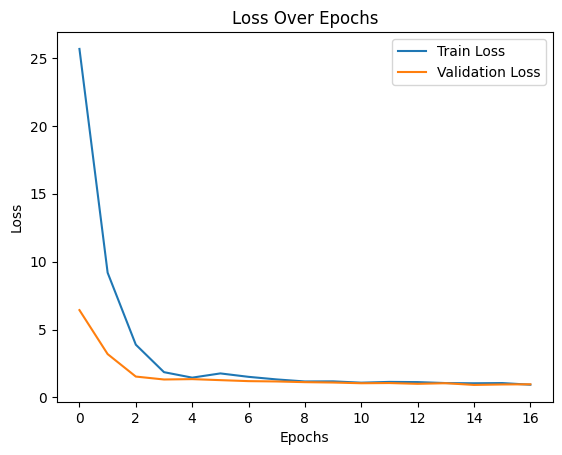

6/6 ━━━━━━━━━━━━━━━━━━━━ 32s 5s/step

Precision score 0.7621025241078223

Recall: 0.7582417582417582

F1 score:  0.7503862887847755

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        60
           1       0.76      0.87      0.81        63
           2       0.62      0.69      0.65        26
           3       0.79      0.45      0.58        33

    accuracy                           0.76       182
   macro avg       0.75      0.71      0.72       182
weighted avg       0.76      0.76      0.75       182


Accuracy: 0.7582417582417582


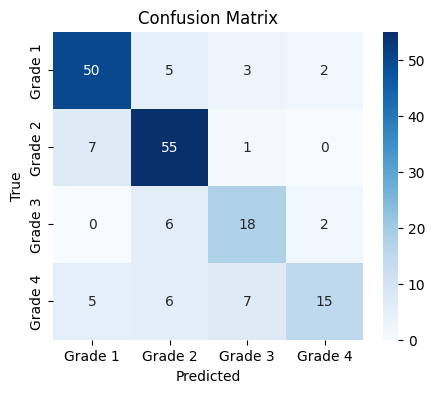

In [37]:
from keras import layers
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.33, stratify=y)

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=4)  # One-hot encoding
y_test = to_categorical(y_test, num_classes=4)

# Ensure base model is not trained
for layer in base_model.layers:
    layer.trainable = False

# Build the top layers with softmax activation for 4-class classification
x = layers.GlobalAveragePooling2D()(base_model.output)  # Global Average Pooling to reduce overfitting
x = layers.Dense(256, activation='relu', kernel_regularizer=l2(0.001))(x)
x = layers.Dropout(0.3)(x)

# Correct output layer with softmax for 4 classes
x = layers.Dense(4, activation='softmax')(x)  # Use softmax for multi-class

# Define the model with categorical cross-entropy
model = tf.keras.models.Model(base_model.input, x)
optimizer = Adam(learning_rate=0.001)

# Compile with categorical cross-entropy and appropriate optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    verbose=1,
    callbacks=[early_stopping]
)

# Plot the accuracy and loss for visualization
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()

display_pred_results(model, X_test, y_test)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 81s 6s/step - accuracy: 0.2897 - loss: 20.7626 - val_accuracy: 0.2228 - val_loss: 3.9377
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 101s 9s/step - accuracy: 0.2976 - loss: 6.9834 - val_accuracy: 0.1739 - val_loss: 2.7098
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - accuracy: 0.2890 - loss: 5.0429 - val_accuracy: 0.2826 - val_loss: 1.9295
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 52s 5s/step - accuracy: 0.3634 - loss: 2.7153 - val_accuracy: 0.4837 - val_loss: 1.6021
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 92s 8s/step - accuracy: 0.4081 - loss: 1.8944 - val_accuracy: 0.4293 - val_loss: 1.6419
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 95s 8s/step - accuracy: 0.3703 - loss: 1.8333 - val_accuracy: 0.5109 - val_loss: 1.5446
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 93s 8s/step - accuracy: 0.4168 - loss: 1.6281 - val_accuracy: 0.4946 - val_loss: 1.5898
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 94s 8s/step - accuracy: 0.4332 - loss: 1.6675 - val_accuracy: 0.5163 - val_los

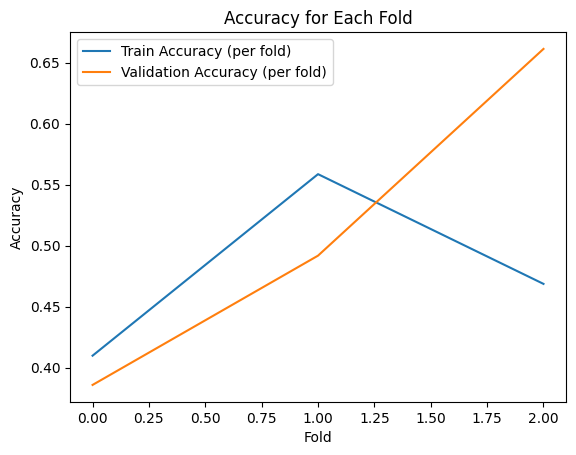

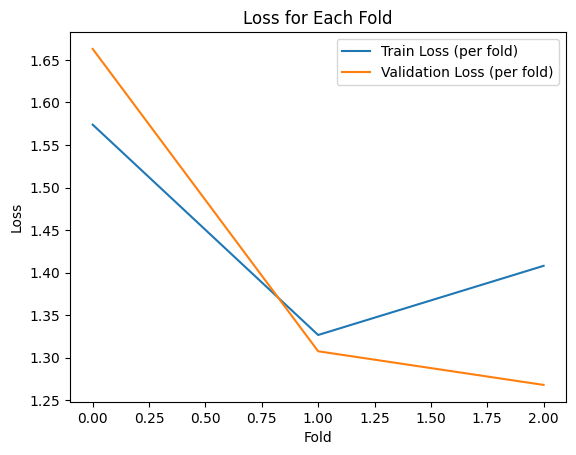

Mean Train Accuracy: 0.47902799646059674
Mean Validation Accuracy: 0.5129583477973938
Mean Train Loss: 1.4361858765284221
Mean Validation Loss: 1.4128299951553345


In [9]:
from keras import layers
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt


# Base model - InceptionV3 with pre-trained weights (do not include the top layers)
base_model = InceptionV3(input_shape = (img_rows, img_cols, 3), include_top = False, weights = 'imagenet')

# Assuming base_model is defined elsewhere
# Ensure base model is not trained
for layer in base_model.layers:
    layer.trainable = False

# One-hot encode the labels (assuming 'y' contains class indices)
y_onehot = to_categorical(y, num_classes=4)  # Adjust the number of classes as needed

# Set up StratifiedKFold for cross-validation
k = 3  # Number of folds
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Prepare lists to store training and validation metrics for each fold
train_accuracies = []
val_accuracies = []
train_losses = []
val_losses = []

# Build the model
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(256, activation='relu', kernel_regularizer=l2(0.001))(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)
x = layers.Dropout(0.3)(x)


# Output layer with softmax for 4 classes
x = layers.Dense(4, activation='softmax')(x)

# Define the model with categorical cross-entropy
model = tf.keras.models.Model(base_model.input, x)
optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# Iterate over each fold
for train_index, val_index in kf.split(X, y):  # Use original 'y' to stratify
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y_onehot[train_index], y_onehot[val_index]

    

    # Train the model for the current fold
    history = model.fit(
        X_train,
        y_train,
        validation_data=(X_val, y_val),
        epochs=20,
        verbose=1,
        callbacks=[early_stopping]
    )

    # Collect training and validation metrics
    train_accuracies.append(history.history['accuracy'][-1])
    val_accuracies.append(history.history['val_accuracy'][-1])
    train_losses.append(history.history['loss'][-1])
    val_losses.append(history.history['val_loss'][-1])

# Compute mean metrics across folds
mean_train_accuracy = np.mean(train_accuracies)
mean_val_accuracy = np.mean(val_accuracies)
mean_train_loss = np.mean(train_losses)
mean_val_loss = np.mean(val_losses)

# Display results for all folds
plt.plot(train_accuracies, label='Train Accuracy (per fold)')
plt.plot(val_accuracies, label='Validation Accuracy (per fold)')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy for Each Fold')
plt.legend()
plt.show()

plt.plot(train_losses, label='Train Loss (per fold)')
plt.plot(val_losses, label='Validation Loss (per fold)')
plt.xlabel('Fold')
plt.ylabel('Loss')
plt.title('Loss for Each Fold')
plt.legend()
plt.show()

# Display mean results
print("Mean Train Accuracy:", mean_train_accuracy)
print("Mean Validation Accuracy:", mean_val_accuracy)
print("Mean Train Loss:", mean_train_loss)
print("Mean Validation Loss:", mean_val_loss)


18/18 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step

Precision score 0.5675530891127222

Recall: 0.6672727272727272

F1 score:  0.6126559714795009

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.84      0.75       180
           1       0.74      0.85      0.79       190
           2       0.00      0.00      0.00        80
           3       0.51      0.53      0.52       100

    accuracy                           0.67       550
   macro avg       0.48      0.56      0.51       550
weighted avg       0.57      0.67      0.61       550


Accuracy: 0.6672727272727272


c:\Users\LWARRIER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LWARRIER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LWARRIER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

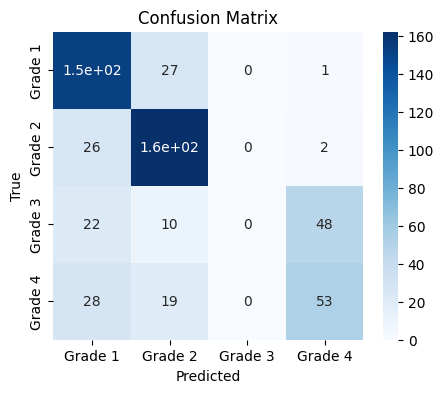

In [13]:

from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test  = train_test_split(X, y_onehot, test_size=0.4, stratify=y_onehot)

display_pred_results(model, X, y_onehot)

In [16]:
y_onehot

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])